In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.morphology as morph

from skimage import io, data, filters, img_as_float, img_as_ubyte
from skimage.color import rgb2gray, gray2rgb
from skimage.filters.rank import mean, median, maximum, minimum
from skimage.morphology import cube, ball, square, disk, diamond, rectangle
from skimage.restoration import (denoise_tv_chambolle,  denoise_bilateral, 
                                 denoise_wavelet)
from skimage.exposure import adjust_gamma
from scipy.signal import convolve2d

plt.rcParams['image.cmap']= 'gray'

## A. Filters and Convolution

In [2]:
camera = img_as_float(data.camera())
coins = img_as_float(data.coins())

In [3]:
filter_a = np.ones((3, 3))*-1
filter_a[1] = 2
print(filter_a)

filter_b = np.ones((3, 3))*-1
filter_b[[0,1,2], [2,1,0]] = 2
print(filter_b)

filter_c = np.ones((3,3))*-1
filter_c[1, 1] = 8
print(filter_c)

filter_d = np.zeros((3, 3))
filter_d[[0,2], 0] = -1
filter_d[[0,2], 2] = 1
filter_d[1, [0,2]] = [-2, 2]
print(filter_d)

filter_e = np.zeros((3, 3))
filter_e[[0,2], 1] = -1
filter_e[1, [0,2]] = 1
print(filter_e)

[[-1. -1. -1.]
 [ 2.  2.  2.]
 [-1. -1. -1.]]
[[-1. -1.  2.]
 [-1.  2. -1.]
 [ 2. -1. -1.]]
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
[[ 0. -1.  0.]
 [ 1.  0.  1.]
 [ 0. -1.  0.]]


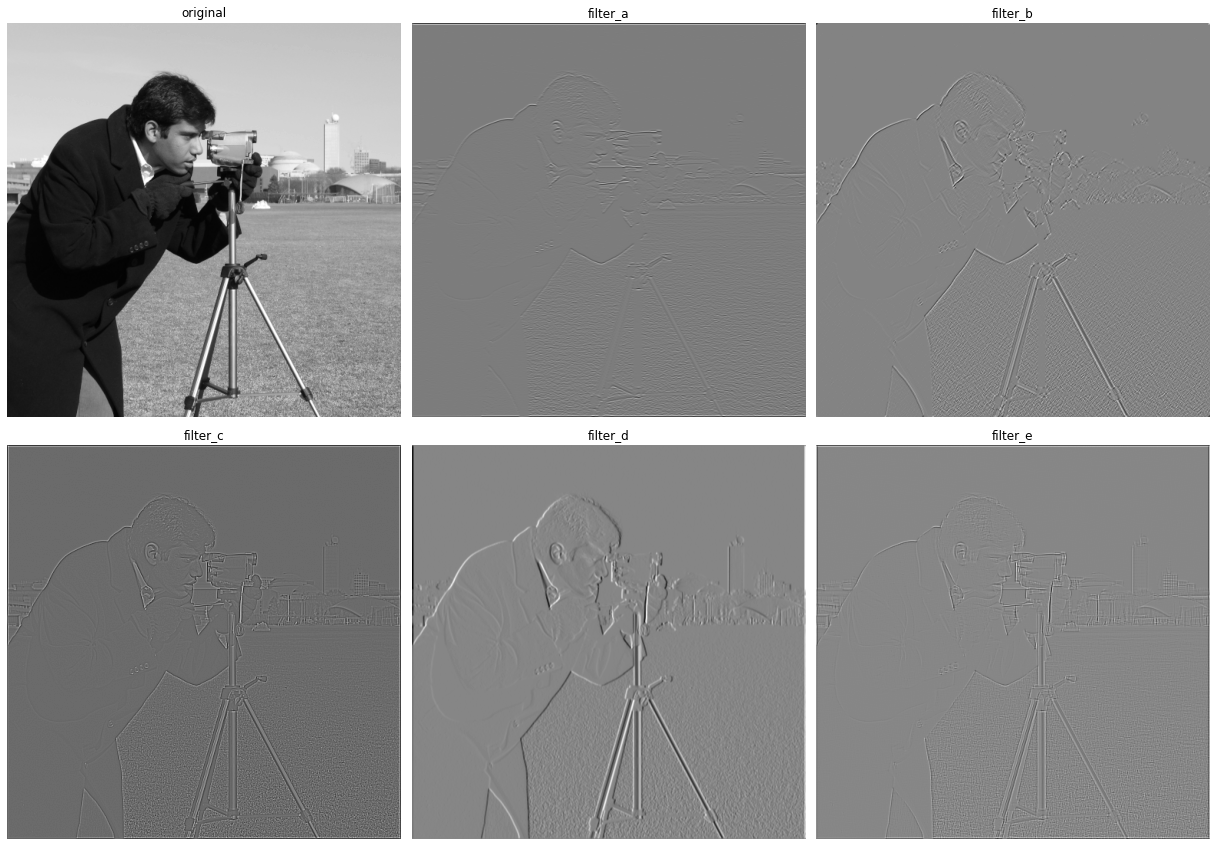

In [4]:
camera_a = convolve2d(camera, filter_a)
camera_b = convolve2d(camera, filter_b)
camera_c = convolve2d(camera, filter_c)
camera_d = convolve2d(camera, filter_d)
camera_e = convolve2d(camera, filter_e)

fig, ax = plt.subplots(2, 3, figsize=(17, 12))

ax[0,0].imshow(camera)
ax[0,0].set_title('original')
ax[0,0].axis('off')

ax[0,1].imshow(camera_a)
ax[0,1].set_title('filter_a')
ax[0,1].axis('off')

ax[0,2].imshow(camera_b)
ax[0,2].set_title('filter_b')
ax[0,2].axis('off')

ax[1,0].imshow(camera_c)
ax[1,0].set_title('filter_c')
ax[1,0].axis('off')

ax[1,1].imshow(camera_d)
ax[1,1].set_title('filter_d')
ax[1,1].axis('off')

ax[1,2].imshow(camera_e)
ax[1,2].set_title('filter_e')
ax[1,2].axis('off')

plt.tight_layout()
plt.show()

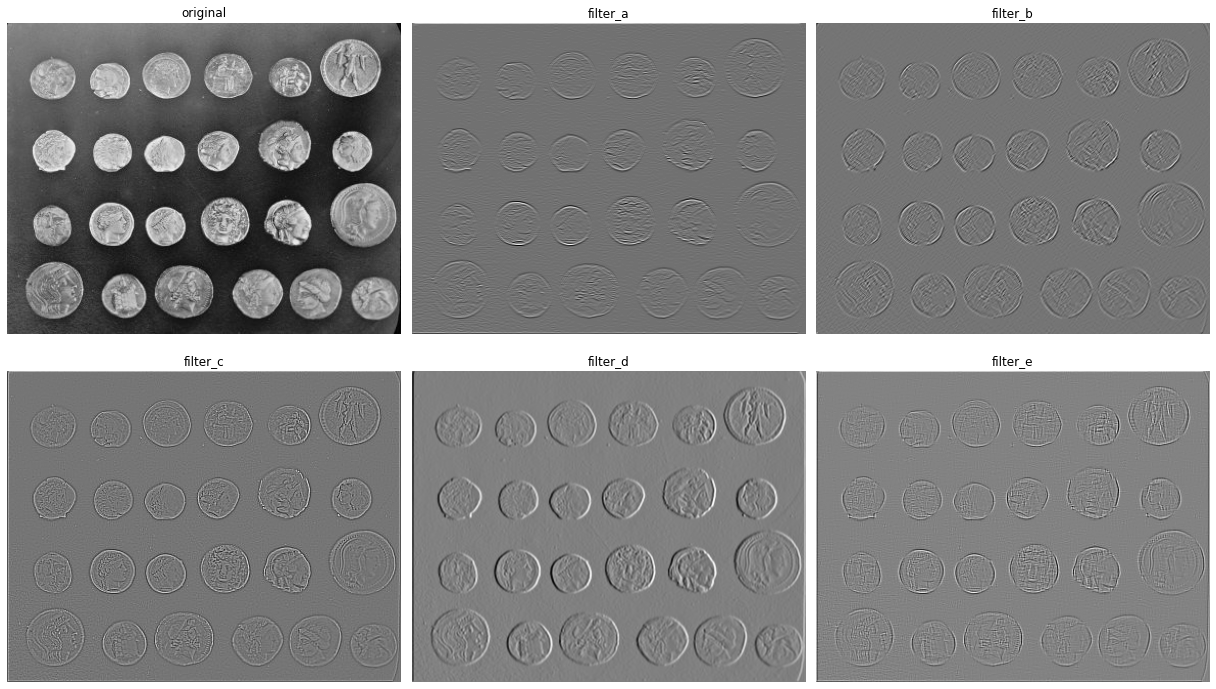

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(17, 10))

coins_a = convolve2d(coins, filter_a)
coins_b = convolve2d(coins, filter_b)
coins_c = convolve2d(coins, filter_c)
coins_d = convolve2d(coins, filter_d)
coins_e = convolve2d(coins, filter_e)

ax[0,0].imshow(coins)
ax[0,0].set_title('original')
ax[0,0].axis('off')

ax[0,1].imshow(coins_a)
ax[0,1].set_title('filter_a')
ax[0,1].axis('off')

ax[0,2].imshow(coins_b)
ax[0,2].set_title('filter_b')
ax[0,2].axis('off')

ax[1,0].imshow(coins_c)
ax[1,0].set_title('filter_c')
ax[1,0].axis('off')

ax[1,1].imshow(coins_d)
ax[1,1].set_title('filter_d')
ax[1,1].axis('off')

ax[1,2].imshow(coins_e)
ax[1,2].set_title('filter_e')
ax[1,2].axis('off')

plt.tight_layout()
plt.show()

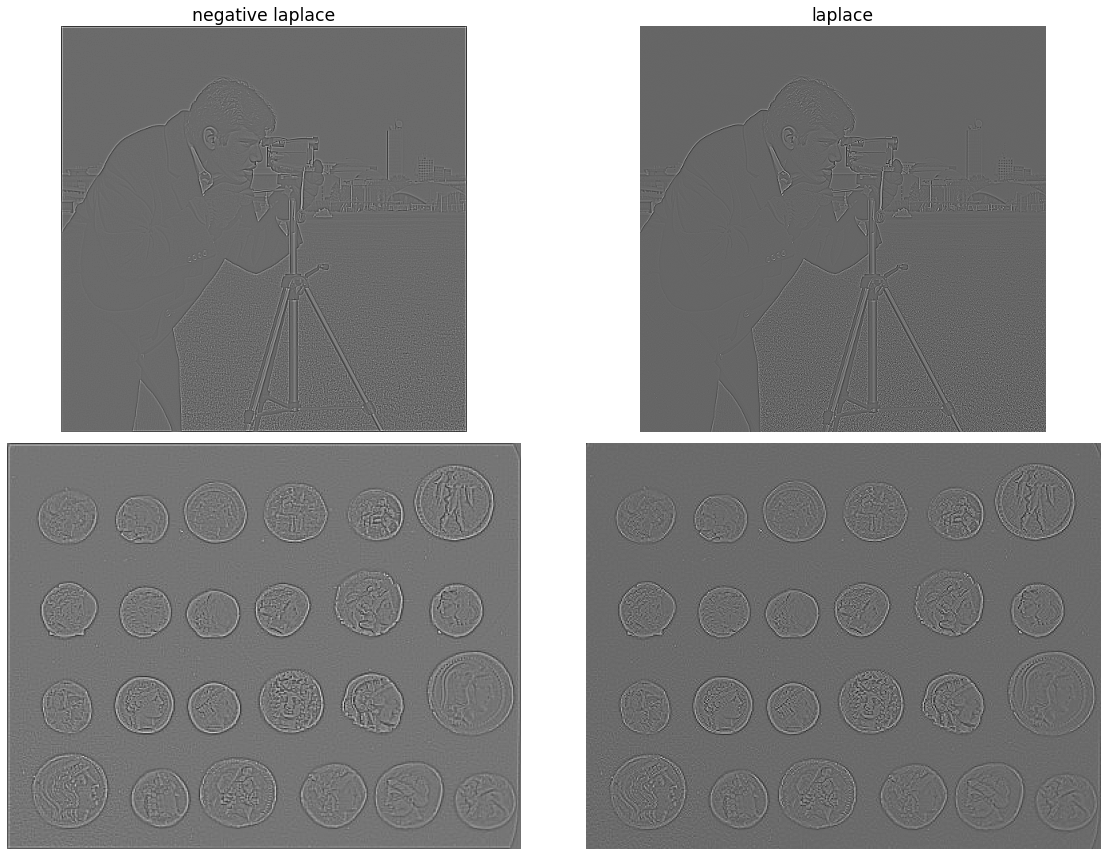

In [6]:
# compare filter_c(negative Laplace filter) to Laplace filter
camera_lplc = filters.laplace(camera)
coins_lplc = filters.laplace(coins)

plt.figure(figsize=(17, 12))
plt.subplot(221)
plt.title('negative laplace', fontsize='xx-large')
plt.imshow(camera_c)
plt.axis('off')
plt.subplot(222)
plt.title('laplace', fontsize='xx-large')
plt.imshow(camera_lplc)
plt.axis('off')
plt.subplot(223)
plt.imshow(coins_c)
plt.axis('off')
plt.subplot(224)
plt.imshow(coins_lplc)
plt.axis('off')

plt.tight_layout()
plt.show()

## C. Image Denoising

(189, 266, 3) float64


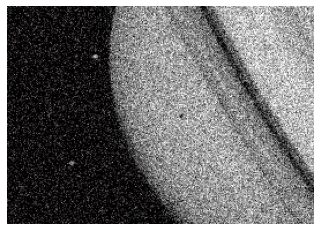

In [8]:
noisy = io.imread('Saturn.jpg')
noisy = img_as_float(noisy)
print(noisy.shape, noisy.dtype)
plt.imshow(noisy)
plt.axis('off')
plt.show()

In [9]:
# Mean filter
mean_1 = mean(img_as_ubyte(noisy), cube(3))
mean_2 = mean(mean_1, cube(3))
mean_3 = mean(mean_2, cube(3))

In [10]:
# Gaussian filter
gauss_1 = filters.gaussian(noisy, multichannel=True)
gauss_2 = filters.gaussian(gauss_1, multichannel=True)
gauss_3 = filters.gaussian(gauss_2, multichannel=True)

In [12]:
# Total variation filter
tv_1 = denoise_tv_chambolle(noisy, multichannel=True)
tv_2 = denoise_tv_chambolle(tv_1, multichannel=True)
tv_3 = denoise_tv_chambolle(tv_2, multichannel=True)

In [13]:
# Bilateral filter
bilat_1 = denoise_bilateral(noisy, multichannel=True)
bilat_2 = denoise_bilateral(bilat_1, multichannel=True)
bilat_3 = denoise_bilateral(bilat_2, multichannel=True)

In [14]:
# Wavelet denoising filter
wavelet_1 = denoise_wavelet(noisy, multichannel=True)
wavelet_2 = denoise_wavelet(wavelet_1, multichannel=True)
wavelet_3 = denoise_wavelet(wavelet_2, multichannel=True)

c:\Users\88697\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\88697\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


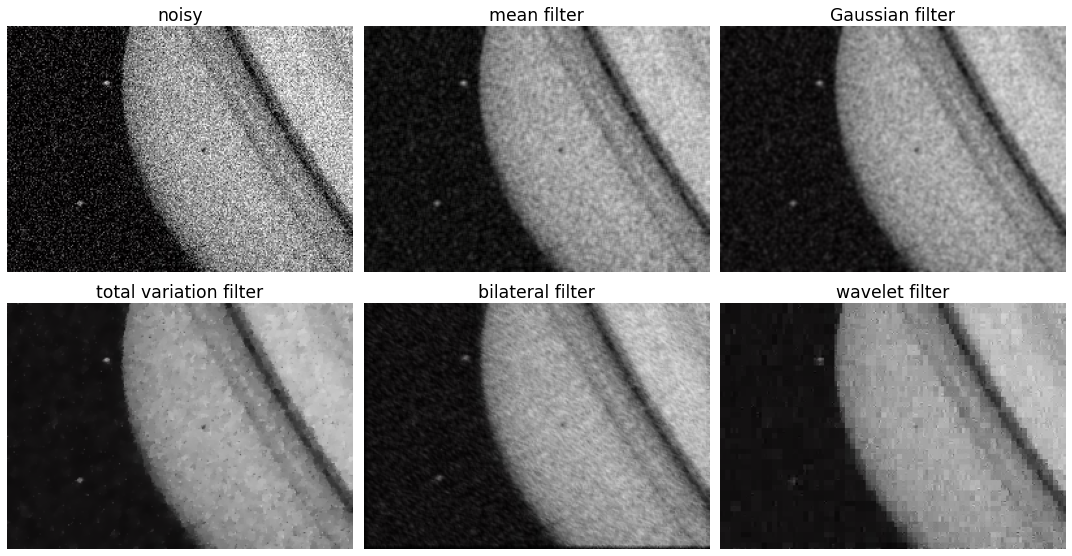

In [15]:
ftrs = [
    noisy, mean_1, gauss_1,
    tv_1, bilat_1, wavelet_1
]

titles = [
    'noisy', 'mean filter', 'Gaussian filter',
    'total variation filter', 'bilateral filter', 'wavelet filter'
]

fig, ax = plt.subplots(2, 3, figsize=(15, 8))
axr = ax.ravel()

for i in range(6):
    axr[i].imshow(ftrs[i])
    axr[i].set_title(titles[i], fontsize='xx-large')
    axr[i].axis('off')

plt.tight_layout()
plt.savefig('filters.jpg')    
plt.show()

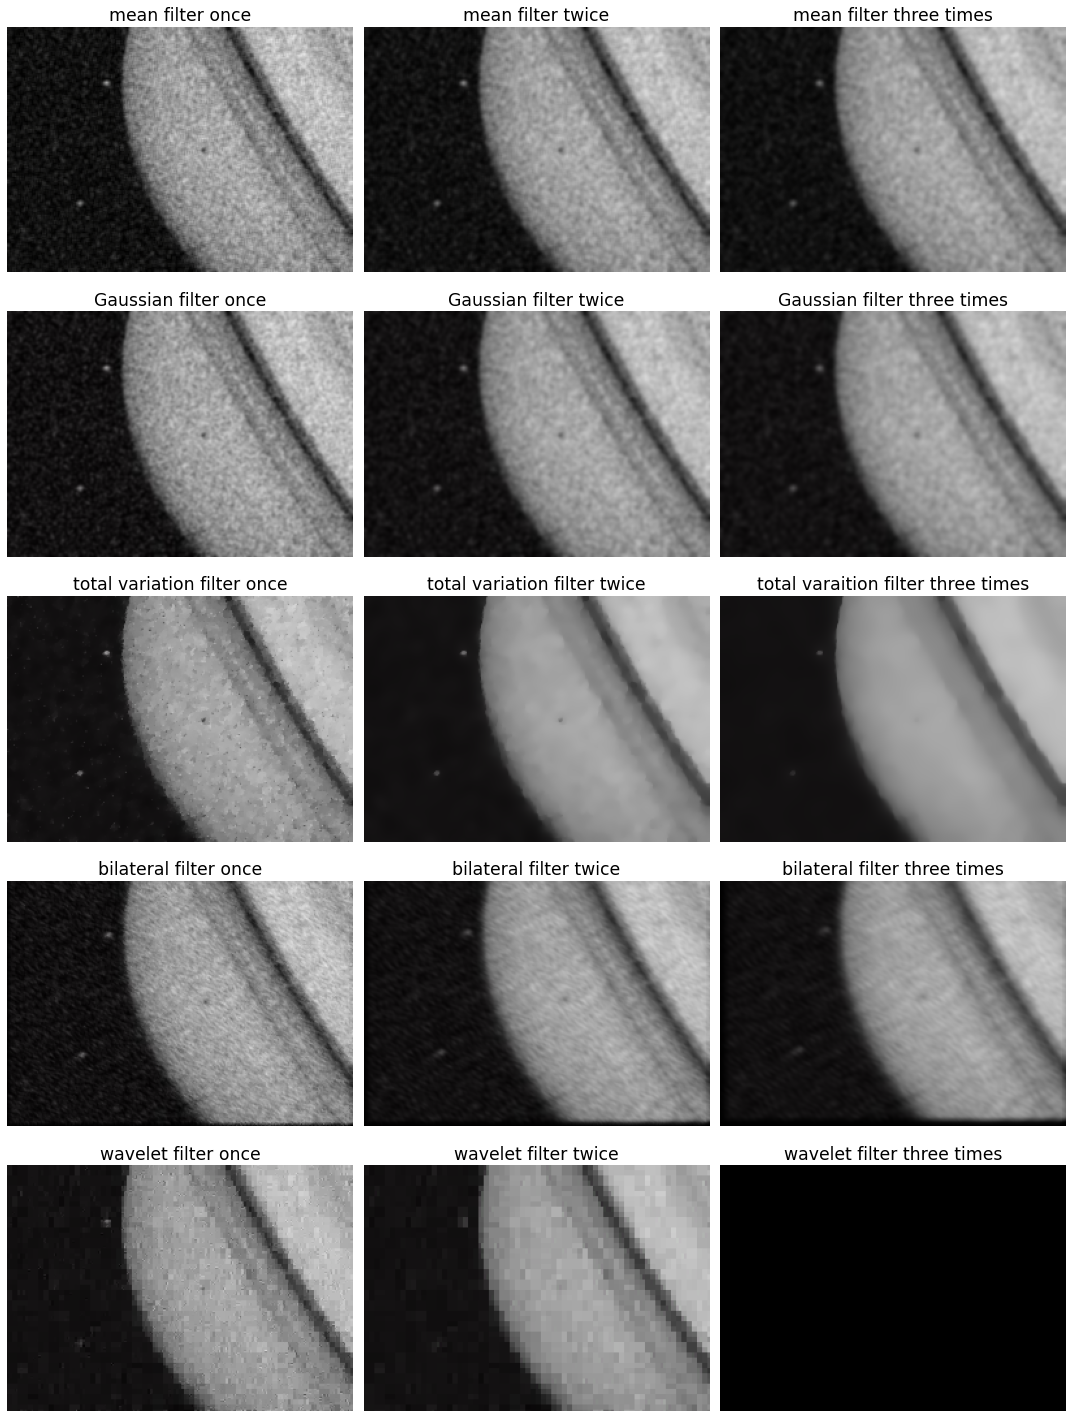

In [16]:
ftrs = [
    mean_1, mean_2, mean_3,
    gauss_1, gauss_2, gauss_3,
    tv_1, tv_2, tv_3,
    bilat_1, bilat_2, bilat_3,
    wavelet_1, wavelet_2, wavelet_3,
]
titles = [
    'mean filter once', 'mean filter twice', 'mean filter three times', 
    'Gaussian filter once', 'Gaussian filter twice', 'Gaussian filter three times', 
    'total variation filter once', 'total variation filter twice', 'total varaition filter three times', 
    'bilateral filter once', 'bilateral filter twice', 'bilateral filter three times', 
    'wavelet filter once', 'wavelet filter twice', 'wavelet filter three times'
]

fig, ax = plt.subplots(5, 3, figsize=(15, 20))
axr = ax.ravel()

for i in range(15):
    axr[i].imshow(ftrs[i])
    axr[i].set_title(titles[i], fontsize='xx-large')
    axr[i].axis('off')

plt.tight_layout()
plt.savefig('filter_times.jpg')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


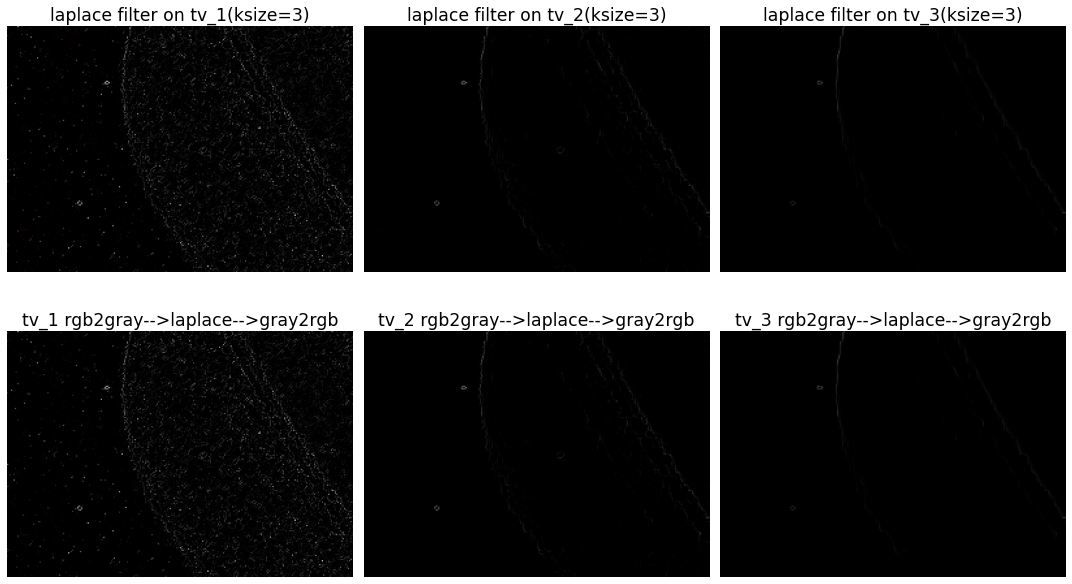

In [17]:
# edge for sharpening
edge_1 = filters.laplace(tv_1, ksize=3)
edge_2 = filters.laplace(tv_2, ksize=3)
edge_3 = filters.laplace(tv_3, ksize=3)
edge_4 = gray2rgb(filters.laplace(rgb2gray(tv_1), ksize=3))
edge_5 = gray2rgb(filters.laplace(rgb2gray(tv_2), ksize=3))
edge_6 = gray2rgb(filters.laplace(rgb2gray(tv_3), ksize=3))

edges = [
    edge_1, edge_2, edge_3, 
    edge_4, edge_5, edge_6
]

titles = [
    'laplace filter on tv_1(ksize=3)', 
    'laplace filter on tv_2(ksize=3)', 
    'laplace filter on tv_3(ksize=3)',
    'tv_1 rgb2gray-->laplace-->gray2rgb', 
    'tv_2 rgb2gray-->laplace-->gray2rgb', 
    'tv_3 rgb2gray-->laplace-->gray2rgb'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
ax = axes.ravel()

for i in range(6):
    ax[i].imshow(edges[i])
    ax[i].set_title(titles[i], fontsize='xx-large')
    ax[i].axis('off')
    
plt.tight_layout()
plt.savefig('edges.jpg')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


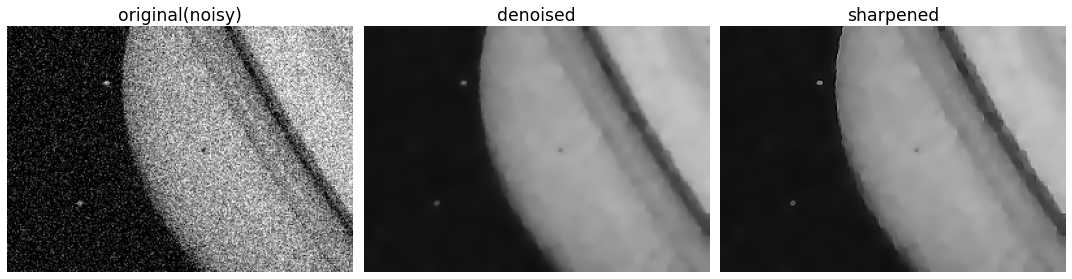

In [18]:
denoised = tv_2.copy()
edges = edge_6.copy()
sharpened = denoised + edges

result = [noisy, denoised, sharpened]
titles = ['original(noisy)', 'denoised', 'sharpened']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

for i in range(3):
    ax[i].imshow(result[i])
    ax[i].set_title(titles[i], fontsize='xx-large')
    ax[i].axis('off')
    
plt.tight_layout()
plt.savefig('final_result.jpg')
plt.show()

## D. Image Enhancing

In [19]:
xray = io.imread('D:/python projects/data_science_lab08/Xray.png')
xray = img_as_float(xray)
print(xray.shape, xray.dtype)

# (a) Apply Laplacian filter to the original image
xray_a = img_as_float(filters.laplace(xray))

# (b) Subtract image from (a) from the original image to obtain a smoothed image
xray_b = img_as_float(xray - xray_a)

# (c) Apply both the horizontal and vertical Sobel filter to the image from (b)
xray_c = img_as_float(filters.sobel(xray_b))

# (d) Smooth image from (c) using a 5×5 averaging filter
xray_d = img_as_float(filters.rank.mean(xray_c, square(5)))

# (e) Element-by-element multiply the images from (b) and (d)
xray_e = img_as_float(xray_b * xray_d)

# (f) Add the image from (e) to the original image to obtain a sharpened image
xray_f = img_as_float(xray + xray_e)

# (g) Apply power-law transformation (i.e., g𝑜 = (g𝑖)0.5) to adjust the image contrast
xray_g = adjust_gamma(xray_f, gamma=0.5)

FileNotFoundError: No such file: 'D:\python projects\data_science_lab08\Xray.png'

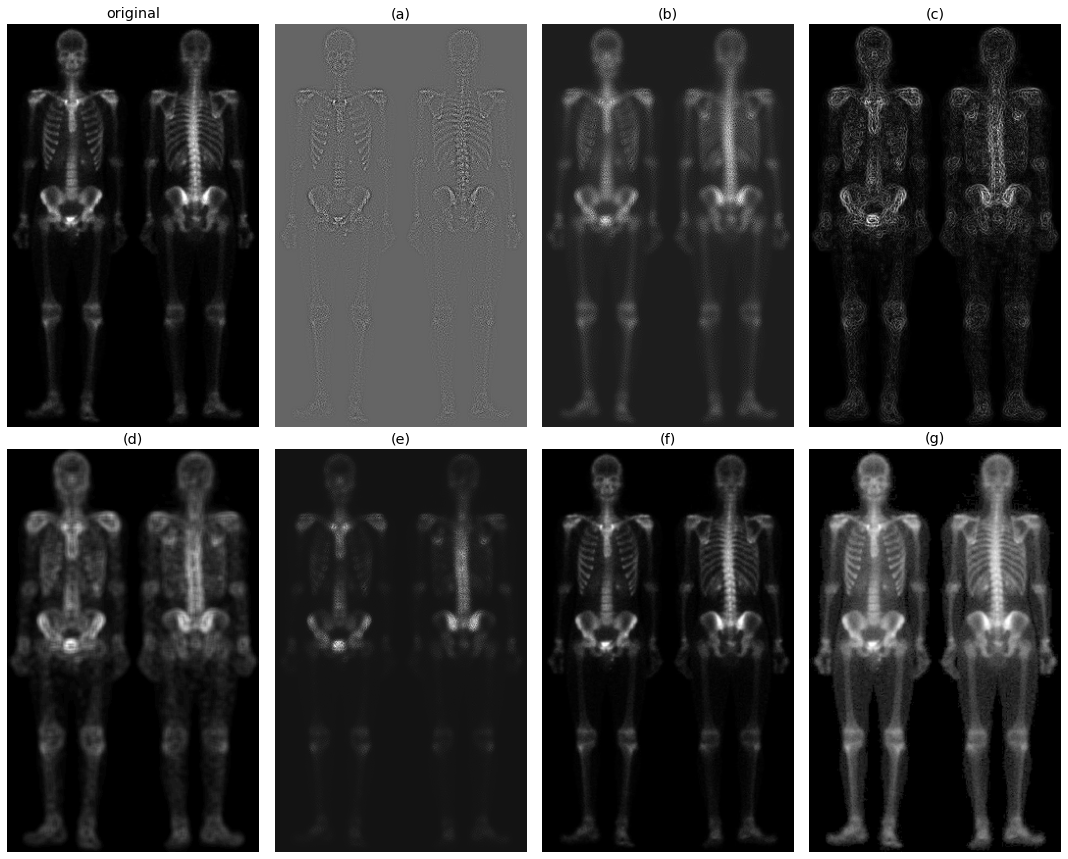

In [ ]:
xrays = [xray, xray_a, xray_b, xray_c, 
         xray_d, xray_e, xray_f, xray_g]
titles = ['original', '(a)', '(b)', '(c)', 
          '(d)', '(e)', '(f)', '(g)']

fig, axes = plt.subplots(2, 4, figsize=(15, 12))
ax = axes.ravel()

for i in range(8):
    ax[i].imshow(xrays[i])
    ax[i].set_title(titles[i], fontsize='x-large')
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()

In [ ]:
plt.imsave('a.jpg', xray_a)
plt.imsave('b.jpg', xray_b)
plt.imsave('c.jpg', xray_c)
plt.imsave('d.jpg', xray_d)
plt.imsave('e.jpg', xray_e)
plt.imsave('f.jpg', xray_f)
plt.imsave('g.jpg', xray_g)

## E. Fingerprint Analysis

In [ ]:
fp = io.imread('D:/python projects/data_science_lab08/Fingerprint.tif')
fp = img_as_float(fp)
print(fp.shape, fp.dtype)

(480, 400) float64


In [ ]:
import fingerprint_enhancer
import scipy

# convert grayscale image to binary
thresh_sauvola = filters.threshold_sauvola(fp, window_size=25, 
                                           k=0.15, r=0.3)
fp_bin = fp > thresh_sauvola
fp_bin = True^fp_bin

# filling holes, removing small objects
fp_1 = morph.remove_small_objects(fp_bin, 35)
fp_2 = morph.remove_small_holes(fp_1)
fp_3 = morph.binary_opening(fp_2, square(1))
fp_4 = morph.binary_closing(fp_3, square(1))
fp_5 = morph.skeletonize(fp_4)

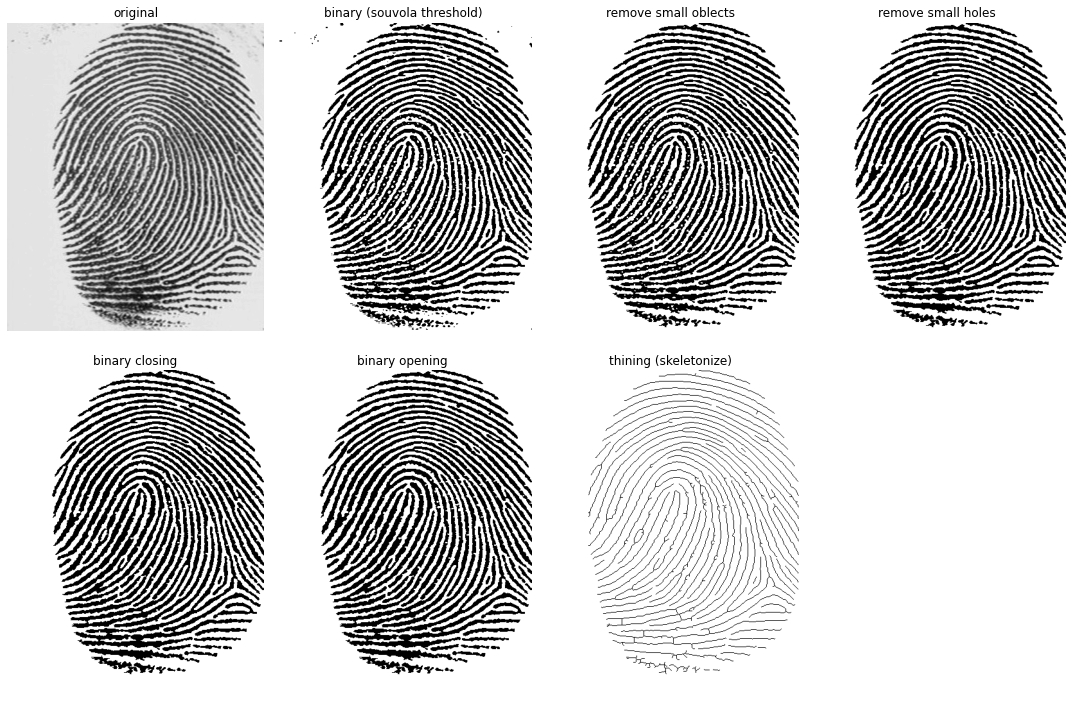

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
ax = axes.ravel()

for i in ax:
    i.axis('off')

ax[0].imshow(fp)
ax[0].set_title('original')
ax[1].imshow(True^fp_bin)
ax[1].set_title('binary (souvola threshold)')
ax[2].imshow(True^fp_1)
ax[2].set_title('remove small oblects')
ax[3].imshow(True^fp_2)
ax[3].set_title('remove small holes')
ax[4].imshow(True^fp_3)
ax[4].set_title('binary closing')
ax[5].imshow(True^fp_4)
ax[5].set_title('binary opening')
ax[6].imshow(True^fp_5)
ax[6].set_title('thining (skeletonize)')

plt.tight_layout()
plt.savefig('fingerprint_preprocessed')
plt.show()

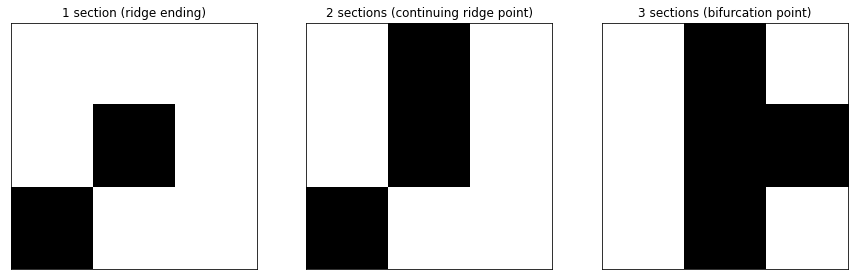

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(True^fp_5[189:192, 197:200])
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('1 section (ridge ending)')
plt.subplot(132)
plt.imshow(True^fp_5[191:194, 196:199])
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('2 sections (continuing ridge point)')
plt.subplot(133)
plt.imshow(True^fp_5[180:183, 175:178])
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('3 sections (bifurcation point)')

plt.savefig('section example')
plt.show()

In [ ]:
def sections(i, j, matrix):
    '''
    Check surrounding eight pixels clockwise and count how many times the value
    changes from True to False or False to True to determine how many sections are
    in the 9-pixel window.
    '''
    
    # If pixel is on border, return None
    if (i == 0 or i == len(matrix)-1 or
        j == 0 or j == len(matrix[0])-1):
        return None
    
    count = 0 
    steps = np.array([
        # A cycle starting from the up left, going clockwise, ending at up left
        (-1, -1), # up left
        (-1, 0),  # up
        (-1, 1),  # up right
        (0, 1),  # right
        (1, 1),  # down right
        (1, 0),  # down
        (1, -1),  # down left
        (0, -1),  # left
        (-1, -1)  # up left
    ])
    next_steps = iter(steps[1:].copy())
    
    for ix, jx in steps: 
        try:
            next_ix, next_jx = next(next_steps)
        except StopIteration:
            break
        new_i = i + ix
        new_j = j + jx
        next_i = i + next_ix
        next_j = j + next_jx
        
        curr = matrix[new_i, new_j]
        next_val = matrix[next_i, next_j]
        
        if next_val != curr:
            count += 1        
        
    return(count/2)

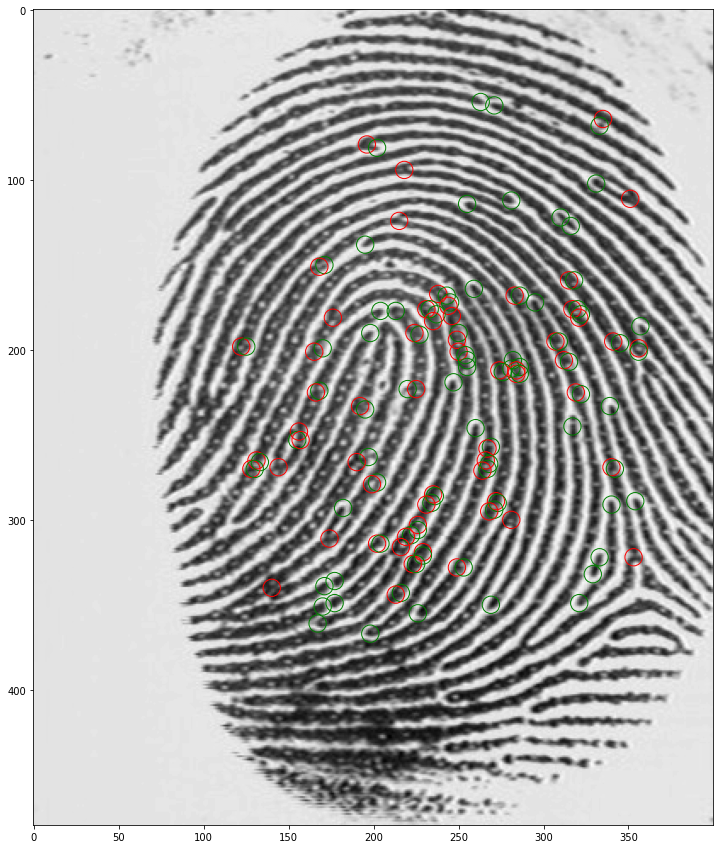

In [ ]:
count = 0
plt.figure(figsize=(15, 15))

fp_range = fp_5[48:370, 120:360]

for i, row in enumerate(fp_range):
    for j, val in enumerate(row):
        if val == True:
            if sections(i, j, fp_range) == 1:
                # Ridge ending
                plt.scatter(120+j, 48+i, s=300, facecolors='none', edgecolors='g')
            elif sections(i, j, fp_range) == 3:
                # Bifurcation point
                plt.scatter(120+j, 48+i, s=300, facecolors='none', edgecolors='r')

plt.imshow(fp)
plt.savefig('minutiae extraction original')
plt.show()

## F. Properties of Convolution